In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [2]:
fake1=pd.read_csv('Fake.csv')
true1=pd.read_csv('True.csv')

In [3]:
# head() funtion displays first 5 rows
fake1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "Class". This column is the Target Feature. It tells whether the news is True (1) or False(0).

In [5]:
true1["class"]=1
fake1["class"]=0

In [6]:
## Concatenating Fake news table and True news Table
tables=[fake1,true1]
result=pd.concat(tables)
result

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
## Shuffling the Result DataFrame (table) and naming it as shuffled_df1
shuffled_df1 = result.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df1.head()

,title,text,subject,date,class
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [8]:
## Dropping the columns that are not needed
df=shuffled_df1.drop(["title","subject","date"],axis=1)
df.head()

,text,class
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


In [9]:
print(df.shape)

(44898, 2)


### Defining Independent and Dependent variable

In [10]:
x=df["text"]
y=df["class"]

In [11]:
## Splitting the dataset into Test Dataset and Training Dataset 
## Training Dataset - 80%, Test Dataset - 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train.head()

36335    Tune in to the Alternate Current Radio Network...
12384    CARACAS (Reuters) - A general appointed at the...
24419    ISTANBUL (Reuters) - Turkey s European Union A...
24740    Democrat Senator Kristen Gillibrand (NY) likes...
27039    WASHINGTON (Reuters) - U.S. Republican preside...
Name: text, dtype: object

In [13]:
y_train.head()

36335    0
12384    1
24419    1
24740    0
27039    1
Name: class, dtype: int64

In [14]:
x_test.head()

22216    Well, that didn t take long. In the short time...
27917    (Reuters) - Republican lawmaker Devin Nunes’ i...
25007    WASHINGTON (Reuters) - President Donald Trump ...
1377     Print journalism and longstanding papers have ...
32476    WASHINGTON (Reuters) - President Donald Trump ...
Name: text, dtype: object

In [15]:
y_test.head()

22216    0
27917    1
25007    1
1377     0
32476    1
Name: class, dtype: int64

# Converting Text to Vector - Below code is preparing two sets of news articles (one for training and one for testing) by converting them into a numerical format that can help a machine learning model figure out if the news is real or fake.

## Explanation - 

1. **What is TF-IDF?**: TF-IDF stands for Term Frequency-Inverse Document Frequency. It’s a way to turn text (like news articles) into numbers that a computer can understand. It looks at how often words appear in a document and compares that to how often they appear across all documents. This helps identify important words that can help tell if a news article is real or fake.

2. **Importing the Tool**: The line `from sklearn.feature_extraction.text import TfidfVectorizer` is bringing in a special tool from a library (Scikit-learn) that helps with this process of converting text into numbers.

3. **Creating the Vectorizer**: The line `vectorization = TfidfVectorizer()` creates an instance of this tool. It is like setting up a machine that will process our text.

4. **Transforming Training Data**: The line `xv_train = vectorization.fit_transform(x_train)` takes the training data (which is the set of articles we’re using to teach our model) and runs it through our TF-IDF machine. It learns which words are important for those articles and converts them into a format that can be used for analysis. 

5. **Transforming Test Data**: The line `xv_test = vectorization.transform(x_test)` does the same for the test data (new articles we want to check) but without teaching the machine again. It uses what it learned from the training data to transform the test data.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer(stop_words='english', max_df=0.7)
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

1. **Logistic Regression** - It is a type of machine learning algorithm that’s often used for classification tasks, like distinguishing between real and fake news.

2. **Creating the Model**: The line `LR = LogisticRegression()` creates an instance of the Logistic Regression model. It is like setting up a new machine that will learn how to classify the news articles.

3. **Training the Model**: In the line `LR.fit(xv_train, y_train)`, the model (LR) is learning from the training data:
   - `xv_train` is the numerical representation of the training news articles (the output from the previous step).
   - `y_train` contains the actual labels for those articles, telling the model which ones are real and which ones are fake.

By fitting the model to this data, it learns to recognize patterns in the features (the important words from the articles) that correspond to each label (real or fake). Essentially, it’s training the model to make predictions based on the examples it sees.

This code sets up a Logistic Regression model and trains it using the processed training data so that it can later predict whether new articles are real or fake based on what it has learned.

In [68]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
## This line uses the trained model to classify the test articles based on what it learned during training.
## The output (pred_lr) will be a list of predictions, telling which articles it thinks are real and which it thinks are fake. 
pred_lr=LR.predict(xv_test)

In [70]:
# Tune Logistic Regression with GridSearchCV
# GridSearchCV = Grid Search + Cross-Validation.
# It tests every combination of parameters you give and selects the best one based on accuracy (or other scoring metric).
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10],                   # Regularization strength
    'penalty': ['l1', 'l2'],                   # Type of penalty
    'solver': ['liblinear', 'saga'],           # Solvers that support l1 and l2
    'class_weight': [None, 'balanced']
}
logreg = LogisticRegression(max_iter=1000)  # Base model

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(xv_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [85]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.9949328360360875


### Score - 
The score method calculates the accuracy of the model by comparing its predictions (what it thinks about the test articles) to the actual labels in y_test. The output is a number between 0 and 1

In [86]:
LR.score(xv_test, y_test)

0.982739420935412

In [92]:
y_pred = best_model.predict(xv_test)

#### The classification_report function provides several important metrics for evaluating the model's performance, including:

Precision: This measures how many of the articles predicted as fake (or real) were actually correct. It's a way to understand the quality of the positive predictions.

Recall (Sensitivity): This measures how many actual fake (or real) articles were correctly identified by the model. It shows how well the model can find positive cases.

F1 Score: This is a harmonic mean of precision and recall, providing a single score that balances both metrics.

Support: This indicates the number of actual occurrences of each class in the test dataset.

In [98]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4710
           1       1.00      0.99      0.99      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4710
           1       1.00      0.99      0.99      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<function matplotlib.pyplot.show(close=None, block=None)>

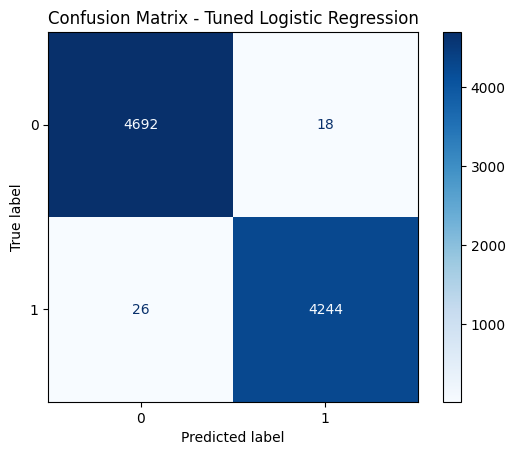

In [102]:
best_model = grid.best_estimator_
y_pred = grid.best_estimator_.predict(xv_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Precision:", precision_score(y_test, pred_lr, pos_label=1))
print("Recall:", recall_score(y_test, pred_lr, pos_label=1))
print("F1 Score:", f1_score(y_test, pred_lr, pos_label=1))


Accuracy: 0.982739420935412
Precision: 0.9785996743428704
Recall: 0.9852459016393442
F1 Score: 0.9819115416034543
